<a href="https://colab.research.google.com/github/WMPantaleao/urban_scaling/blob/main/urban_scaling_r0_bra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df_bra = pd.read_csv('df_bra_casos_mm.csv') # média móvel de casos acumulados por rgi
df_bra = df_bra.drop(['Unnamed: 0'], 1)
df_bra

<ipython-input-6-1a3f93a50192>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_bra = df_bra.drop(['Unnamed: 0'], 1)


,RGI,POP,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27
0,110001,666953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101038.0,101038.0,101038.0,101038.0,101038.0,101038.0,101038.0,101038.0,101038.0,101038.0
1,110002,242279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36453.5,36453.9,36454.4,36454.9,36455.5,36456.3,36456.8,36457.3,36457.8,36458.3
2,110003,122216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17386.5,17386.5,17386.5,17386.5,17386.5,17386.5,17386.5,17386.5,17386.5,17386.5
3,110004,313023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43281.0,43281.0,43281.0,43281.0,43281.0,43281.0,43281.0,43281.0,43281.0,43281.0
4,110005,308988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44016.5,44016.5,44016.5,44016.5,44016.5,44016.5,44016.5,44016.5,44016.5,44016.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,520019,722640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79554.0,79554.0,79554.0,79554.0,79554.0,79554.0,79554.0,79554.0,79554.0,79554.0
506,520020,506355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32266.0,32266.0,32266.0,32266.0,32266.0,32266.0,32266.0,32266.0,32266.0,32266.0
507,520021,127197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9861.0,9861.0,9861.0,9861.0,9861.0,9861.0,9861.0,9861.0,9861.0,9861.0
508,520022,57410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2706.0,2706.0,2706.0,2706.0,2706.0,2706.0,2706.0,2706.0,2706.0,2706.0


In [7]:
import numpy as np

def r0_seir(group: pd.DataFrame, tau: float, tau_e: float, start: float, t: float):
  
  r0_seir = []
  gamma = 1 / tau
  sigma = 1/ tau_e

  for i in range(0, len(group)):
    casos = pd.DataFrame(group.iloc[i, 2:]).reset_index()
    casos = casos.drop(['index'], 1)
    
    for j in range(len(casos)):
      if casos.iloc[j, 0] >= start:
        alpha = (np.log(casos.iloc[j + t, 0]) - np.log(casos.iloc[j, 0])) / t
        r_0_seir = ((alpha + sigma) * (alpha + gamma)) / (sigma * gamma)
        break
    
    r0_seir.append(r_0_seir)
    df_r0_seir = pd.DataFrame(r0_seir)
    df_r0_seir['POP'] = group['POP']
    df_r0_seir['R0'] = df_r0_seir[0]
    df_r0_seir = df_r0_seir.drop([0], 1)

  return df_r0_seir

In [8]:
df_bra_r0 = r0_seir(df_bra, 11.5, 5.1, 1, 60)
df_bra_r0

<ipython-input-7-332ef1e307be>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  casos = casos.drop(['index'], 1)
<ipython-input-7-332ef1e307be>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_r0_seir = df_r0_seir.drop([0], 1)


,POP,R0
0,666953,3.868181
1,242279,3.304973
2,122216,2.570573
3,313023,2.845632
4,308988,3.074736
...,...,...
505,722640,2.861420
506,506355,3.005859
507,127197,2.596035
508,57410,2.681602


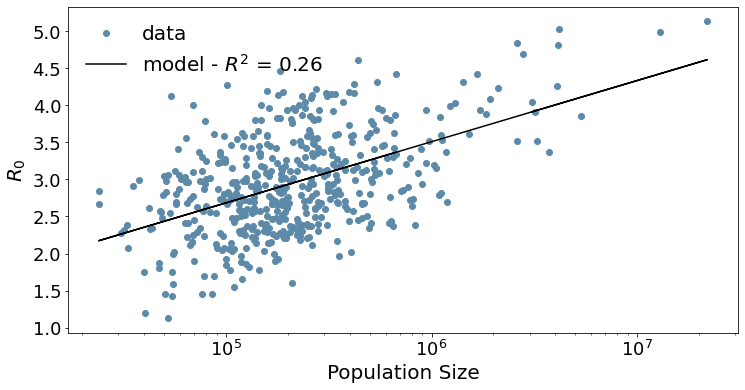

In [9]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

x_pop = df_bra_r0['POP']
y = df_bra_r0['R0']

def test_log(x, a, b):
    return a + b * np.log(x)

param_pop, param_cov_pop = curve_fit(test_log, x_pop, y)
z_pop = test_log(x_pop, param_pop[0],  param_pop[1])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.semilogx(x_pop, y, 'o', color = '#5d8aa8', label = r'data')
ax.plot(x_pop, z_pop, 'k', label = r'model - $R^{2}$ = %.2f' %r2_score(y, z_pop))
ax.tick_params(axis = 'both', labelsize = 18)

ax.set_ylabel(r'$R_0$', fontsize = 20)
ax.set_xlabel(r'Population Size', fontsize = 20)
ax.legend(frameon = False, loc = 'upper left', fontsize = 20)
plt.show()